In [17]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [18]:
HH = pd.read_csv('HH_daily.csv')
WTI = pd.read_csv('WTI_daily.csv')
gold = pd.read_csv('COMEX_Gold_daily.csv')
copper = pd.read_csv('COMEX_Copper_daily.csv')
nickel = pd.read_csv('Nickel_daily.csv')
zinc = pd.read_csv('Zinc_daily.csv')

# HH

In [19]:
HH.dropna(inplace=True)
HH.reset_index(drop=True,inplace=True)

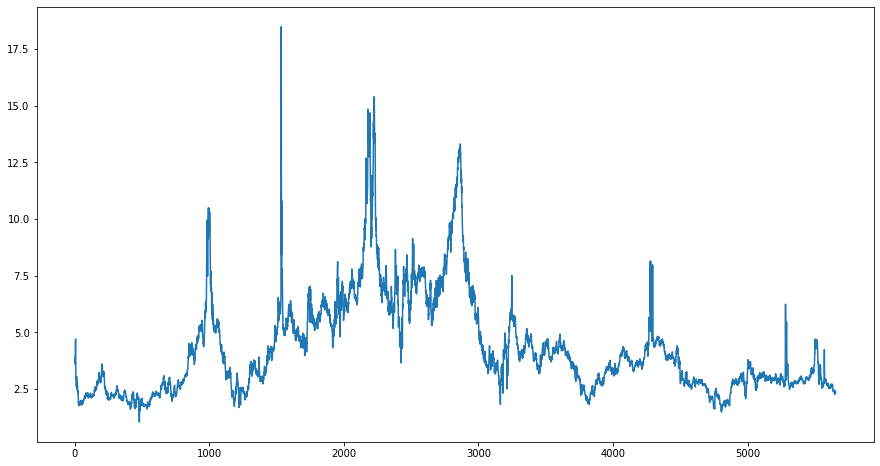

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(HH["HH_daily"])

In [21]:
num = 5

lags = range(1, (1+num))
HH = HH.assign(**{
    '{} (t-{})'.format('HH_daily', t): HH["HH_daily"].shift(t)
    for t in lags
})

In [22]:
for i in range(num):
    HH.drop([i],inplace=True)

HH.reset_index(drop=True,inplace=True)

In [23]:
HH_predict = HH.loc[0:(len(HH))-251,:]
HH_forecasting = HH.loc[(len(HH)-250):len(HH),:]

In [24]:
X_train = HH_predict.drop("HH_daily", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = HH_predict["HH_daily"].values
X_forecast = HH_forecasting.drop("HH_daily", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = HH_forecasting["HH_daily"].values

# WTI

In [182]:
WTI.dropna(inplace=True)
WTI.reset_index(drop=True,inplace=True)

In [183]:
num = 2

lags = range(1, (1+num))
WTI = WTI.assign(**{
    '{} (t-{})'.format('WTI_daily', t): WTI["WTI_daily"].shift(t)
    for t in lags
})

In [184]:
for i in range(num):
    WTI.drop([i],inplace=True)

WTI.reset_index(drop=True,inplace=True)

In [185]:
WTI_predict = WTI.loc[0:(len(WTI))-251,:]
WTI_forecasting = WTI.loc[(len(WTI)-250):len(WTI),:]

In [186]:
X_train = WTI_predict.drop("WTI_daily", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = WTI_predict["WTI_daily"].values
X_forecast = WTI_forecasting.drop("WTI_daily", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = WTI_forecasting["WTI_daily"].values

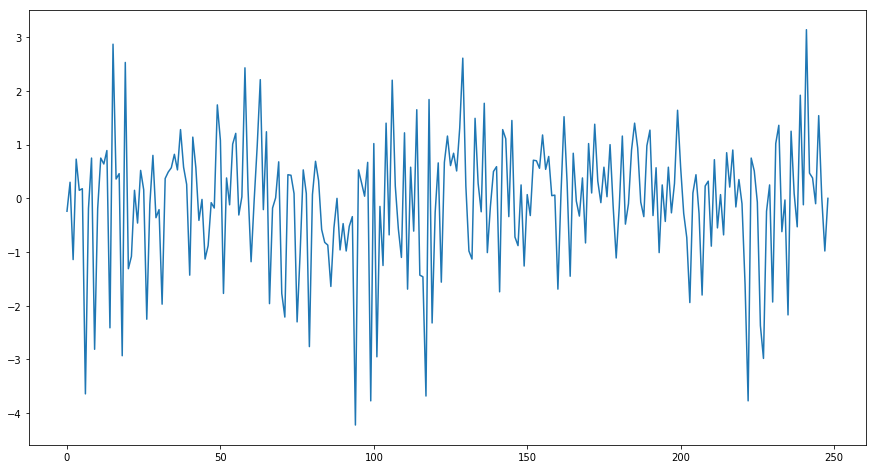

In [187]:
y_diff = np.zeros(249)

for i in range(len(y_forecast)-2):
    y_diff[i] = y_forecast[i+1] - y_forecast[i]

plt.figure(figsize=(15, 8))
plt.plot(y_diff)

# Gold

In [3]:
gold.dropna(inplace=True)
gold.reset_index(drop=True,inplace=True)

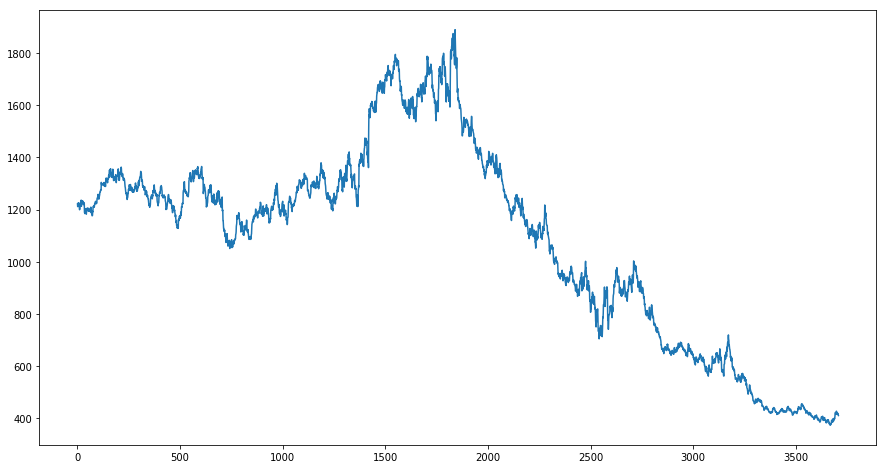

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(gold["Gold"])

In [5]:
num = 1

lags = range(1, (1+num))
gold = gold.assign(**{
    '{} (t-{})'.format('Gold', t): gold["Gold"].shift(t)
    for t in lags
})

In [6]:
for i in range(num):
    gold.drop([i],inplace=True)

gold.reset_index(drop=True,inplace=True)

In [7]:
gold_predict = gold.loc[0:(len(gold))-251,:]
gold_forecasting = gold.loc[(len(gold)-250):len(gold),:]

In [8]:
X_train = gold_predict.drop("Gold", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = gold_predict["Gold"].values
X_forecast = gold_forecasting.drop("Gold", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = gold_forecasting["Gold"].values

# Copper

In [124]:
copper.dropna(inplace=True)
copper.reset_index(drop=True,inplace=True)

In [125]:
num = 2

lags = range(1, (1+num))
copper = copper.assign(**{
    '{} (t-{})'.format('Copper', t): copper["Copper"].shift(t)
    for t in lags
})

In [126]:
for i in range(num):
    copper.drop([i],inplace=True)

copper.reset_index(drop=True,inplace=True)

In [127]:
copper_predict = copper.loc[0:(len(copper))-251,:]
copper_forecasting = copper.loc[(len(copper)-250):len(copper),:]

In [128]:
X_train = copper_predict.drop("Copper", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = copper_predict["Copper"].values
X_forecast = copper_forecasting.drop("Copper", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = copper_forecasting["Copper"].values

# Nickel

In [194]:
nickel.dropna(inplace=True)
nickel.reset_index(drop=True,inplace=True)

In [195]:
num = 1

lags = range(1, (1+num))
nickel = nickel.assign(**{
    '{} (t-{})'.format('Nickel', t): nickel["Nickel"].shift(t)
    for t in lags
})

In [196]:
for i in range(num):
    nickel.drop([i],inplace=True)

nickel.reset_index(drop=True,inplace=True)

In [197]:
nickel_predict = nickel.loc[0:(len(nickel))-251,:]
nickel_forecasting = nickel.loc[(len(nickel)-250):len(nickel),:]

In [198]:
X_train = nickel_predict.drop("Nickel", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = nickel_predict["Nickel"].values
X_forecast = nickel_forecasting.drop("Nickel", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = nickel_forecasting["Nickel"].values

# Zinc

In [1]:
zinc.dropna(inplace=True)
zinc.reset_index(drop=True,inplace=True)

NameError: name 'zinc' is not defined

In [201]:
num = 1

lags = range(1, (1+num))
zinc = zinc.assign(**{
    '{} (t-{})'.format('Zinc', t): zinc["Zinc"].shift(t)
    for t in lags
})

In [202]:
for i in range(num):
    zinc.drop([i],inplace=True)

zinc.reset_index(drop=True,inplace=True)

In [203]:
zinc_predict = zinc.loc[0:(len(zinc))-251,:]
zinc_forecasting = zinc.loc[(len(zinc)-250):len(zinc),:]

In [204]:
X_train = zinc_predict.drop("Zinc", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = zinc_predict["Zinc"].values
X_forecast = zinc_forecasting.drop("Zinc", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = zinc_forecasting["Zinc"].values

# RandomForestRegressor

In [8]:
from sklearn.model_selection import GridSearchCV

#training model with k-fold cross validation
def train_model_with_cv(model, params, X_train, y_train):
    gs_clf = GridSearchCV(model, params, n_jobs=-2, cv=5)
    gs_clf = gs_clf.fit(X_train, y_train)
    model = gs_clf.best_estimator_
    
    return model

In [164]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

parameters = {'n_estimators':[250,500,750,1000], 
              'max_depth': [10,20],
              'min_samples_split': [5,10],
              'min_samples_leaf': [5,10,20]
             }

rnd_best = train_model_with_cv(rfr, parameters, X_train, y_train)
print(rnd_best)
forecast_result = rnd_best.predict(X_forecast)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


# Keras

In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X)
X_forecast_scaled = scaler.transform(X_forecast)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, BatchNormalization, Dropout
from keras.regularizers import l1, l2, l1_l2
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.initializers import RandomNormal

from numpy.random import seed

Using TensorFlow backend.


# Keras-ANN

In [28]:
seed(42)

K.clear_session()
model = Sequential()
model.add(Dense(units=1000, input_dim=5, kernel_initializer='he_normal', bias_initializer='he_normal', activation='elu', 
                kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                             moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01),
                             gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
# optimizer = SGD(lr=0.15, momentum=0.01, nesterov=True)
optimizer = Adam(lr=0.08, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_absolute_percentage_error', optimizer=optimizer)
early_stop = EarlyStopping(monitor='val_loss',patience=30,verbose=1,restore_best_weights=True)
model.fit(X_train_scaled,y_train,epochs=1000,batch_size=50,verbose=1,validation_split=0.3,callbacks=[early_stop])
forecast_result=model.predict(X_forecast_scaled)

Train on 3779 samples, validate on 1620 samples
Epoch 1/1000
3779/3779 [==============================] - 1s 250us/step - loss: 66.9213 - val_loss: 23.7617
Epoch 2/1000
3779/3779 [==============================] - 0s 105us/step - loss: 23.5143 - val_loss: 16.0989
Epoch 3/1000
3779/3779 [==============================] - 0s 102us/step - loss: 23.0134 - val_loss: 44.6095
Epoch 4/1000
3779/3779 [==============================] - 0s 102us/step - loss: 26.8639 - val_loss: 19.4590
Epoch 5/1000
3779/3779 [==============================] - 0s 101us/step - loss: 26.4126 - val_loss: 22.0440
Epoch 6/1000
3779/3779 [==============================] - 0s 99us/step - loss: 27.0735 - val_loss: 34.2564
Epoch 7/1000
3779/3779 [==============================] - 0s 95us/step - loss: 22.6638 - val_loss: 22.0193
Epoch 8/1000
3779/3779 [==============================] - 0s 95us/step - loss: 27.1278 - val_loss: 19.7478
Epoch 9/1000
3779/3779 [==============================] - 0s 96us/step - loss: 27.6608 - va

In [121]:
# seed(42)

# K.clear_session()
# model = Sequential()
# ini = RandomNormal()
# model.add(Dense(units=40, input_dim=1, activation='relu'))
# model.add(Dense(units=20, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=1, activation='linear'))
# # optimizer = SGD(lr=0.15, momentum=0.01, nesterov=True)
# optimizer = Adam(lr=0.065, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mean_absolute_percentage_error', optimizer=optimizer)
# early_stop = EarlyStopping(monitor='val_loss',patience=50,verbose=1,restore_best_weights=True)
# model.fit(X_train_scaled,y_train,epochs=2000,batch_size=250,verbose=0,validation_split=0.3,callbacks=[early_stop])
# forecast_result=model.predict(X_forecast_scaled)

Restoring model weights from the end of the best epoch
Epoch 00902: early stopping


# Keras-RNN

In [31]:
seed(42)

X_train_reshape = X_train_scaled.reshape(len(X_train_scaled),5,1)
y_train_reshape = y_train.reshape(len(y_train),1)
X_forecast_reshape = X_forecast_scaled.reshape(len(X_forecast_scaled),5,1)

K.clear_session()
model = Sequential()
model.add(SimpleRNN(units=500, input_shape=(5,1), kernel_initializer='he_normal', recurrent_initializer='he_normal', 
                    bias_initializer='he_normal', activation='elu', kernel_regularizer=l1_l2(l1=0.01,l2=0.01), 
                    recurrent_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01), 
                    activity_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                             moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01),
                             gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
adam=Adam(lr=0.0013, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_absolute_percentage_error', optimizer=adam)
early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
model.fit(X_train_reshape,y_train_reshape,epochs=1000,batch_size=50,verbose=0,validation_split=0.3,callbacks=[early_stop])
forecast_result=model.predict(X_forecast_reshape)
# model.get_weights()

Restoring model weights from the end of the best epoch
Epoch 00258: early stopping


# Keras-LSTM

In [187]:
seed(42)

X_train_reshape = X_train_scaled.reshape(len(X_train_scaled),2,1)
y_train_reshape = y.reshape(len(y),1)
X_forecast_reshape = X_forecast_scaled.reshape(len(X_forecast_scaled),2,1)

K.clear_session()
model = Sequential()
model.add(LSTM(units=500, input_shape=(2,1), activation="elu", kernel_initializer="he_normal", recurrent_initializer="he_normal",
               bias_initializer="he_normal"))
model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                             moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01),
                             gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_absolute_percentage_error', optimizer=adam)
early_stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1, restore_best_weights=True)
model.fit(X_train_reshape,y_train_reshape,epochs=3000,batch_size=50,verbose=0,validation_split=0.3,callbacks=[early_stop])
forecast_result=model.predict(X_forecast_reshape)

Restoring model weights from the end of the best epoch
Epoch 00172: early stopping


# XGBoost

In [1]:
import xgboost as xgb

In [25]:
data_matrix = xgb.DMatrix(data=X_train, label=y_train)

In [15]:
from sklearn.model_selection import GridSearchCV

#training model with k-fold cross validation
def train_model_with_cv(model, params, X_train, y_train):
    gs_clf = GridSearchCV(model, params, n_jobs=-2, cv=5)
    gs_clf = gs_clf.fit(X_train, y_train)
    model = gs_clf.best_estimator_
    
    return model

In [33]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state = 42)

parameters = {'max_depth': [3,5,10,20],
              'learning_rate': [0.001,0.01,0.1,0.5],
              'n_estimators': [100,300,500,750,1000],
              'gamma': [0,0.001,0.01]
             }

xgb_best = train_model_with_cv(xg_reg, parameters, X_train, y_train)
print(xgb_best)
forecast_result = xgb_best.predict(X_forecast)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


# Result

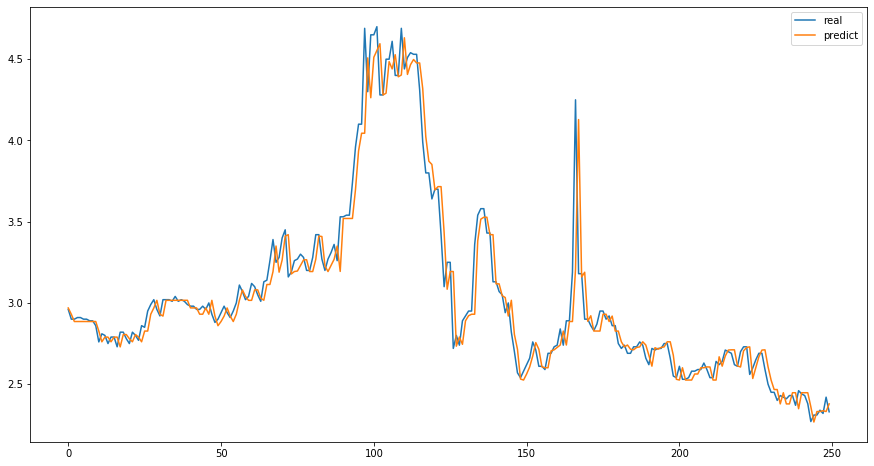

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(y_forecast)
plt.plot(forecast_result)

plt.legend(['real', 'predict'])

In [35]:
y_predict = np.zeros(250)
for i in range(len(forecast_result)):
    y_predict[i] = forecast_result[i]

mape1 = np.abs((y_forecast - y_predict)/(y_forecast+0.00000001))

mape2 = 0
for i in range(len(mape1)):
    mape2 += mape1[i]

mape3 = 100 * (mape2 / len(mape1))
mape3

2.5051022282446236

In [36]:
y_forecast-y_predict

array([-8.97387505e-03, -3.04084778e-02,  1.44297123e-02,  2.41047478e-02,
        2.44297123e-02,  1.44297123e-02,  1.44297123e-02,  4.42971230e-03,
        4.42971230e-03, -2.55702877e-02, -6.68308640e-02,  4.92103672e-02,
        1.03326321e-02, -3.96673679e-02,  2.92103672e-02,  3.32632065e-04,
       -5.96673679e-02,  9.05798149e-02,  1.45297718e-02, -2.54702282e-02,
       -2.98590660e-02,  5.92103672e-02, -5.47022820e-03, -1.96673679e-02,
        9.92103672e-02,  2.31691360e-02,  1.23169136e-01,  5.95915222e-02,
        5.10261250e-02, -5.59306526e-02, -1.04084778e-02,  1.00994368e-01,
        4.06934738e-03,  3.74438286e-03, -5.93065262e-03,  2.40693474e-02,
       -6.25561714e-03,  3.74438286e-03, -6.25561714e-03, -2.62556171e-02,
        1.07011604e-02,  1.07011604e-02, -9.29883957e-03,  2.92665577e-02,
        4.95915222e-02, -8.97387505e-03,  6.95915222e-02, -8.59306526e-02,
       -3.90056324e-02,  4.00816441e-02,  5.44297123e-02,  6.09943676e-02,
       -2.89738750e-02, -